In [15]:

import pandas as pd 
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import imgaug.augmenters as iaa

In [16]:
# ================================

# 1. Load dataset

# ================================

train_data = pd.read_csv('archive/sign_mnist_train.csv')
test_data = pd.read_csv('archive/sign_mnist_test.csv')

y_train = train_data['label']
X_train = train_data.drop('label', axis=1)

y_test = test_data['label']
X_test = test_data.drop('label', axis=1)


In [17]:
# ================================

# 2. Train/Validation split

# ================================

X_train, X_validate, y_train, y_validate = train_test_split( X_train,
y_train, test_size=0.2, random_state=42, stratify=y_train )

In [18]:
# ================================

# 3. Normalize

# ================================

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate) 
X_test =scaler.transform(X_test)


In [19]:
# ================================

# 4. Data augmentation for MLP

# ================================

# Reshape to images

X_train_imgs = X_train.reshape(-1, 28, 28)
# change type of X_train_imgs to float32 for imgaug
X_train_imgs = X_train_imgs.astype(np.float32)

# Augmentation includes rotation, translation, shear, brightness change
augmenter = iaa.Sequential([ iaa.Affine(rotate=(-15, 15),
                                         translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)}, shear=(-10,10)), 
                                         iaa.Multiply((0.8, 1.2)),])

# Create augmented images

aug_imgs = augmenter(images=X_train_imgs)
aug_imgs_flat = aug_imgs.reshape(-1, 784)

# Combine

X_train_aug = np.vstack([X_train, aug_imgs_flat])
y_train_aug =np.hstack([y_train, y_train])


print("Original training set size:", X_train.shape[0])
print("Augmented training set size:", X_train_aug.shape[0])


Original training set size: 21964
Augmented training set size: 43928


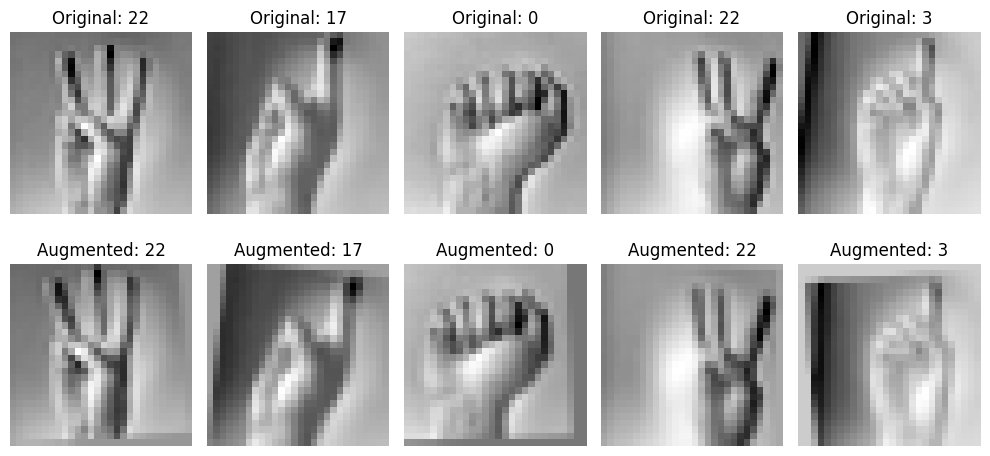

In [20]:
# print Examples of augmented images
import matplotlib.pyplot as plt
# change X_trian type to float64 before plot
# X_train_imgs = X_train_imgs.astype(np.float64)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    axes[0, i].imshow(X_train_imgs[i], cmap='gray')
    axes[0, i].set_title(f'Original: {y_train.iloc[i]}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(aug_imgs[i], cmap='gray')
    axes[1, i].set_title(f'Augmented: {y_train.iloc[i]}')
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()
# ================================


In [42]:
# ================================

# 5. Train MLP

# ================================
# hidden_layer_sizes=(128, 64),
# “Training accuracy:” 0.9944
# “Validation accuracy:” 0.9971
# “Test accuracy:” 0.8989
model = MLPClassifier(
        
        hidden_layer_sizes=(64),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate_init=0.001,
        verbose=True,
        random_state=42,
        n_iter_no_change=15,
        max_iter=1000,
        # shuffle=False
    )

model.fit(X_train_aug, y_train_aug)

print("Model converged in", model.n_iter_, "epochs.")


Iteration 1, loss = 1.53891863
Iteration 2, loss = 0.89694241
Iteration 3, loss = 0.71583800
Iteration 4, loss = 0.61431944
Iteration 5, loss = 0.54849482
Iteration 6, loss = 0.49749028
Iteration 7, loss = 0.45672198
Iteration 8, loss = 0.42575300
Iteration 9, loss = 0.39752752
Iteration 10, loss = 0.37392562
Iteration 11, loss = 0.35076334
Iteration 12, loss = 0.33269589
Iteration 13, loss = 0.31685957
Iteration 14, loss = 0.30594280
Iteration 15, loss = 0.28944135
Iteration 16, loss = 0.27779726
Iteration 17, loss = 0.26368986
Iteration 18, loss = 0.25249161
Iteration 19, loss = 0.24254760
Iteration 20, loss = 0.23654246
Iteration 21, loss = 0.22583361
Iteration 22, loss = 0.21937819
Iteration 23, loss = 0.21110589
Iteration 24, loss = 0.20420586
Iteration 25, loss = 0.19918112
Iteration 26, loss = 0.18956543
Iteration 27, loss = 0.18582320
Iteration 28, loss = 0.17909055
Iteration 29, loss = 0.17431468
Iteration 30, loss = 0.16757166
Iteration 31, loss = 0.16104299
Iteration 32, los

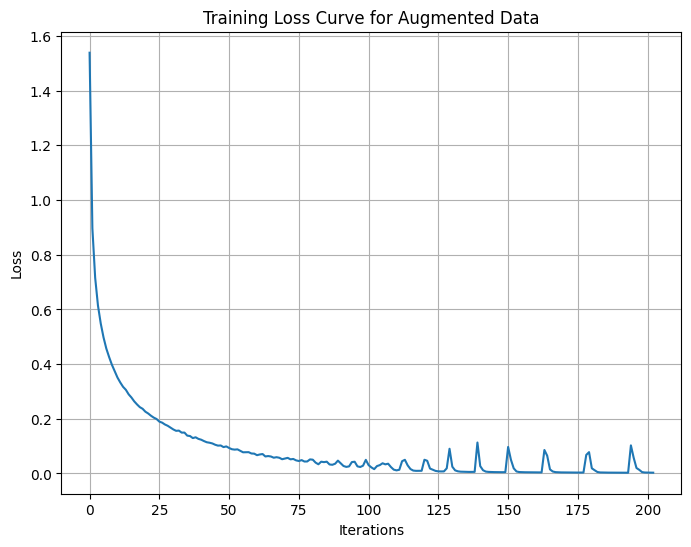

In [43]:
# Plot training loss curve for augmented model
plt.figure(figsize=(8,6))
plt.plot(model.loss_curve_)
plt.title("Training Loss Curve for Augmented Data")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [44]:
# ================================

# 6. Evaluation

# ================================
train_accuracy = model.score(X_train_aug, y_train_aug)* 100
print(f"Training Accuracy: { train_accuracy:.4f}%")

val_accuracy = accuracy_score(y_validate, model.predict(X_validate))* 100
print(f"Validation Accuracy: {val_accuracy:.4f}%")

test_accuracy = accuracy_score(y_test, model.predict(X_test))* 100
print(f"Test Accuracy: {test_accuracy:.4f}%")


print("Report on Test Data:")
print(classification_report(y_test,model.predict(X_test)))

Training Accuracy: 100.0000%
Validation Accuracy: 99.9636%
Test Accuracy: 82.6548%
Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       331
           1       0.97      0.92      0.94       432
           2       0.93      1.00      0.97       310
           3       0.69      0.82      0.75       245
           4       0.88      0.88      0.88       498
           5       0.84      0.97      0.90       247
           6       0.88      0.77      0.82       348
           7       0.97      0.91      0.94       436
           8       0.94      0.94      0.94       288
          10       0.96      0.75      0.84       331
          11       0.84      0.99      0.91       209
          12       0.62      0.88      0.73       394
          13       0.87      0.43      0.58       291
          14       1.00      0.96      0.98       246
          15       0.94      0.95      0.95       347
          16       0.79      0.

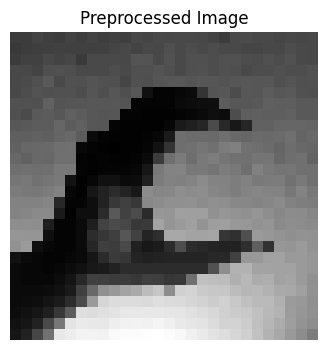

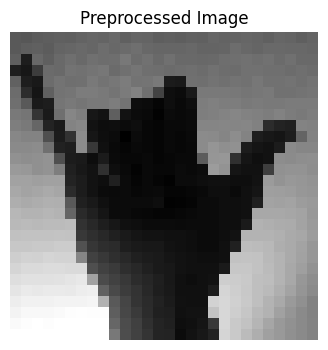

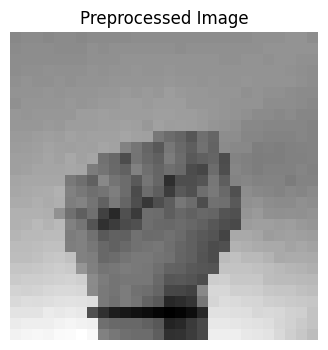

Predicted label for image 1: H
Predicted label for image 2: F
Predicted label for image 3: I


In [39]:
import cv2
import numpy as np

def preprocess_image_for_model(path):
    # Load image
    img = cv2.imread(path)
    if img is None:
        raise ValueError("Image not found or path incorrect")

    # Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize to 28x28 (MNIST format)
    img = cv2.resize(img, (28, 28))
    
    #Plot the processed image
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')
    plt.show()
    # Apply binary thresholding
    _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)  
    
    # Invert colors if your hand is dark and background is light
    # # Comment this out if your hand is white on black
    # img = 255 - img

    # Normalize to 0..1
    img = img.astype("float32") / 255.0

    # Flatten into shape (1, 784)
    img = img.reshape(1, 784)
    


    return img

# Example:
test_img = preprocess_image_for_model("test_images/test_image.jpeg")
test_img2 = preprocess_image_for_model("test_images/test_image2.jpeg")
test_img3 = preprocess_image_for_model("test_images/test_image3.jpeg")


prediction = model.predict(test_img)
prediction2 = model.predict(test_img2)
prediction3 = model.predict(test_img3)




label_to_letter = {i: chr(65 + i) for i in range(26)}
print("Predicted label for image 1:",label_to_letter[prediction[0]])
print("Predicted label for image 2:",label_to_letter[prediction2[0]])
print("Predicted label for image 3:",label_to_letter[prediction3[0]])

